In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [81]:
yolo = cv2.dnn.readNet("yolov3.weights" ,"yolov3.cfg")

In [82]:
classes=[]
file_name='coco.names'
with open(file_name,'r')as f:
    classes=f.read().split('\n')

In [83]:
len(classes)

81

In [84]:
image=cv2.imread("zoo.jpg")

blobFromImage(image[, scalefactor[, size[, mean[, swapRB[, crop[, ddepth]]]]]])

In [85]:
blob=cv2.dnn.blobFromImage(image,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [86]:
blob.shape

(1, 3, 320, 320)

In [87]:
i=blob[0].reshape(320,320,3)

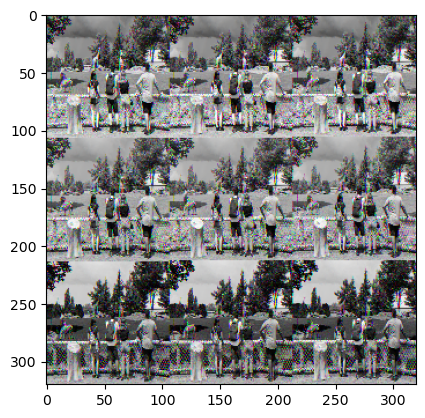

In [88]:
plt.imshow(i)

In [89]:
yolo.setInput(blob)

In [90]:
output_layer_names = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_names)


In [91]:
boxes=[]
confidences=[]
class_ids=[]

height, width, _ = image.shape

for output in layeroutput:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        if confidence>0.6:
            centre_x=int(detection[0]*width)
            centre_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)

            
            x=int(centre_x-w/2)
            y=int(centre_y-h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [92]:
len(boxes)

22

In [93]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [94]:
font=cv2.FONT_HERSHEY_COMPLEX_SMALL
colors=np.random.uniform(0,255,size=(len(boxes),3))

rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) -> img

putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]]) -> img

In [95]:
fontscale=1

for i in indexes.flatten():
    x,y,w,h=boxes[i]
    label=str(classes[class_ids[i]])
    confi=str(round(confidences[i],2))
    color=colors[i]
    
    cv2.rectangle(image,(x,y),(x+w,y+h),color,1)
    #cv2.putText(image, label+" ", (x, y+20), font,fontScale=fontscale, 2, (0, 255, 0), 1)
    cv2.putText(image, label+" "+confi, (x, y+20), font, fontScale=fontscale, thickness=1, color=(255, 255,255), lineType=1)



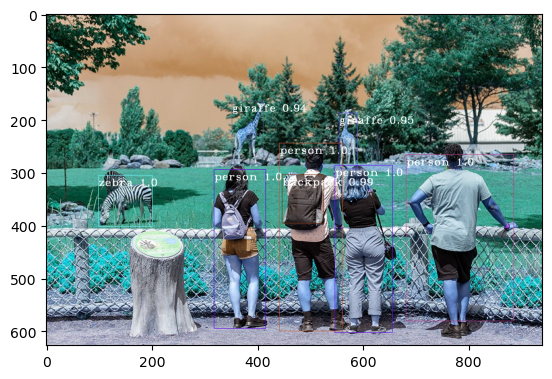

In [96]:
plt.imshow(image)

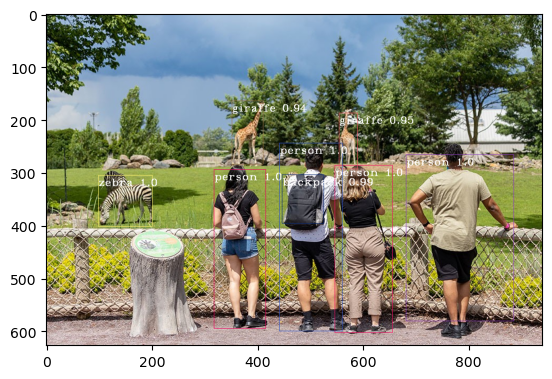

In [97]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [98]:
cap = cv2.VideoCapture("bnglr_street.mp4")


In [100]:


while True:
    # Read frame from camera
    ret, image = cap.read()
    if not ret:
        break
    
    blob=cv2.dnn.blobFromImage(image,1/255,(320,320),(0,0,0),swapRB=True,crop=False)
    i=blob[0].reshape(320,320,3)
    yolo.setInput(blob)
    output_layer_names = yolo.getUnconnectedOutLayersNames()
    layeroutput = yolo.forward(output_layer_names)
    boxes=[]
    confidences=[]
    class_ids=[]

    height, width, _ = image.shape

    for output in layeroutput:
        for detection in output:
            score=detection[5:]
            class_id=np.argmax(score)
            confidence=score[class_id]
            if confidence>0.6:
                centre_x=int(detection[0]*width)
                centre_y=int(detection[1]*height)
                w=int(detection[2]*width)
                h=int(detection[3]*height)


                x=int(centre_x-w/2)
                y=int(centre_y-h/2)

                boxes.append([x,y,w,h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
    font=cv2.FONT_HERSHEY_COMPLEX_SMALL
    colors=np.random.uniform(0,255,size=(len(boxes),3))
    fontscale=1
    if len(indexes) > 0:
        for i in indexes[0].flatten():
            x,y,w,h=boxes[i]
            label=str(classes[class_ids[i]])
            confi=str(round(confidences[i],2))
            color=colors[i]

            cv2.rectangle(image,(x,y),(x+w,y+h),color,1)
            #cv2.putText(image, label+" ", (x, y+20), font,fontScale=fontscale, 2, (0, 255, 0), 1)
            cv2.putText(image, label+" "+confi, (x, y+20), font, fontScale=fontscale, thickness=1, color=(255, 255,255), lineType=1)

        cv2.imshow("Output", image)
        key = cv2.waitKey(1)
        if key == 27:
            break

# Release resources
cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 